In [78]:
import hashlib, time, sys, csv
import numpy as np
from random import randint
# from scipy.stats import expon
from matplotlib import pyplot as plt

# *Exponential distribution :*

In [50]:
loop = 10000

In [51]:
def pow(target):
    # print('-------- TARGET : ' + str(target) + ' --------')

    time_result = []

    for _ in range(loop):
        # print('Loop : ' + str(i+1) + '/' + str(loop))
        challenge = '5JskLFx82fGh7eFP3c12XXX'
        solution = ''
        hash_solution = ''
        # nonce = -1
        start = time.time()
        while hash_solution[:target] != '0'*target:
            nonce = randint(0, sys.maxsize)
            # nonce += 1
            solution = challenge + str(nonce)
            hash_solution = hashlib.sha256(solution.encode('utf-8')).hexdigest()
        totaltime = time.time() - start

        # print('time: ', totaltime)
        time_result.append(totaltime)
        # print('sha256: ', hash_solution)
        # print('block: ', solution)
        # print('nonce: ', nonce)

    time_result.sort()

    return time_result

In [52]:
time_result = pow(3)

In [53]:
x = [i for i in range(1, len(time_result)+1, 1)]

Text(0, 0.5, 'Time (s)')

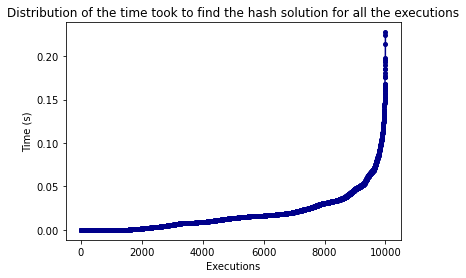

In [54]:
plt.plot(x, time_result, '-ok', color='darkblue', markersize=4)
plt.title('Distribution of the time took to find the hash solution for all the executions')
plt.xlabel('Executions')
plt.ylabel('Time (s)')

In [55]:
f = open('expow_distribution_values.csv', 'w')
f.close()

In [56]:
with open('expow_distribution_values.csv', 'w') as f: 
    write = csv.writer(f) 
    write.writerow(time_result)

# *Exponential law :*

## *Visualization*

In [104]:
with open('expow_distribution_values.csv', newline='') as f:
    reader = csv.reader(f)
    time_result = list(reader)[0]

In [105]:
for i in range(len(time_result)):
    time_result[i] = float(time_result[i])

In [106]:
base = time_result[0]
end = time_result[-1]
interval = end - base
steps = interval/(len(time_result)/2)

rangeprob = [i for i in np.arange(base, end, steps)]
rangeprob.pop()

0.22750451974868774

In [107]:
probr = []

for i in rangeprob:
    result = [x for x in time_result if x >= i]
    probr.append(len(result)/loop)

Text(0, 0.5, 'Probability')

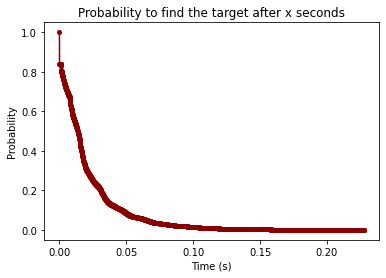

In [108]:
plt.plot(rangeprob, probr, '-ok', color='darkred', markersize=4)
plt.title('Probability to find the target after x seconds')
plt.xlabel('Time (s)')
plt.ylabel('Probability')

## *Computation*

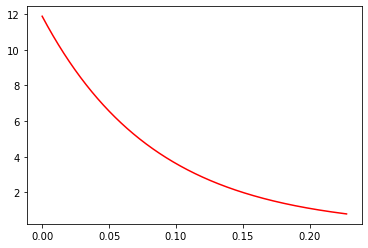

In [122]:
# param=expon.fit(probr)
# pdf_fitted=expon.pdf(rangeprob, scale=param[-1])
# plt.plot(rangeprob, pdf_fitted, 'r')

In [125]:
# ... ??